### Author: Abel Fereja 
### Date: 01-Nov-2022 
#### The Goal of the project is to perform ETL on some of the dataset provided by the World Bank keeping in mind its future use in Data Science Models.
World Bank Projects & Operations provides access to basic information on all of the World Bank's lending projects from 1947 to the present The dataset includes basic information such as the project title, task manager, country, project id, sector, themes, commitment amount, product line, and financing. It also provides links to publicly disclosed online documents.

https://datacatalog.worldbank.org/search/dataset/0037800

#### Other Indicators:

Population (1960 - 2020):

https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart

GDP(in US$):

https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart

### Credit to: 
JOHNYMARIAH, whose most codes(found in kaggle) are used for this training purpose.


In [28]:
import numpy as np 
import pandas as pd
!pip install xlrd  # to read data from spreadsheet

## EXTRACT

In [29]:
df_projects = pd.read_excel('Projects.xls',dtype='str',skiprows=2)
df_projects.head(2)

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,NaN,http://projects.worldbank.org/P174708/null?lan...,2022-03-21T00:00:00Z,...,15000000,Ministry of Finance,Investment Project Financing,B,Substantial,NaN,NaN,NaN,NaN,NaN
1,P176877,Latin America and Caribbean,Federative Republic of Brazil,Active,Governance Risk Assessment System Brazil Scale-Up,Improve the process of detecting fraud in publ...,National Council for Internal Control - CONACI,NaN,http://projects.worldbank.org/P176877/null?lan...,2022-03-21T00:00:00Z,...,130000,National Council for Internal Control - CONACI,Investment Project Financing,NaN,Low,NaN,NaN,NaN,NaN,NaN


In [4]:
#Inspecting a sample record, second raw or record
df_projects.iloc[1]

id                                                                    P176877
regionname                                        Latin America and Caribbean
countryname                                     Federative Republic of Brazil
projectstatusdisplay                                                   Active
project_name                Governance Risk Assessment System Brazil Scale-Up
pdo                         Improve the process of detecting fraud in publ...
impagency                      National Council for Internal Control - CONACI
cons_serv_reqd_ind                                                        NaN
url                         http://projects.worldbank.org/P176877/null?lan...
boardapprovaldate                                        2022-03-21T00:00:00Z
closingdate                                                               NaN
projectfinancialtype                                                   Grants
curr_project_cost                                               

In [30]:
#Checking for null values
df_projects.isnull().sum()

id                              0
regionname                      2
countryname                     2
projectstatusdisplay            2
project_name                    0
pdo                          9966
impagency                   14939
cons_serv_reqd_ind          20038
url                             0
boardapprovaldate            2874
closingdate                  5022
projectfinancialtype         8613
curr_project_cost             147
curr_ibrd_commitment            0
curr_ida_commitment             0
curr_total_commitment           0
grantamt                        0
borrower                    15171
lendinginstr                  248
envassesmentcategorycode     8391
esrc_ovrl_risk_rate         20277
sector1                      2002
sector2                     10432
sector3                     13987
theme1                       9219
theme2                      11579
dtype: int64

In [44]:
df_projects.shape

(21474, 26)

Population Dataset

In [31]:
df_population = pd.read_excel('population.xls',dtype='str',skiprows=3)

In [32]:
df_population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208,55434,56234,56699,57029,57357,...,102050,102565,103165,103776,104339,104865,105361,105846,106310,106766
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,532760424,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,30117411,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,360285439,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,5770573,...,24220660,25107925,26015786,26941773,27884380,28842482,29816769,30809787,31825299,32866268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000,966000,994000,1022000,1050000,1078000,...,1791000,1807106,1818117,1812771,1788196,1777557,1791003,1797085,1788878,1775378
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351,5393034,5473671,5556767,5641598,5727745,...,23807586,24473176,25147112,25823488,26497881,27168210,27834811,28498683,29161922,29825968
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836,17524533,17965733,18423157,18896303,19384838,...,52003759,52832659,53687125,54544184,55386369,56207649,57009751,57792520,58558267,59308690
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780,3164330,3260645,3360099,3463211,3570466,...,14023199,14465148,14926551,15399793,15879370,16363449,16853608,17351714,17861034,18383956


In [33]:
df_population.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2016              2
2017              2
2018              2
2019              2
2020              2
Length: 65, dtype: int64

In [48]:
df_population.isnull().sum().max()

2

All the year columns have upto 2 values missing. Inspecting further the rows that have null values.

In [34]:
df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
69,Eritrea,ERI,"Population, total",SP.POP.TOTL,1007586,1033320,1060489,1088859,1118152,1148188,...,3213969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Kuwait,KWT,"Population, total",SP.POP.TOTL,269026,300581,337346,378756,423900,472032,...,3168054,3348852,3526382,3690939,3835588,3956862,4056102,4137314,4207077,4270563
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986,3979998,4076708,4173398,4270092,4367088,4454805,4569087,4685306,4803269


Looks like 4 countries that are listed have missing values in them

GDP Dataset

In [35]:
df_gdp = pd.read_excel('gdp.xls', skiprows=3)
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,...,1770.736230,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,591.190030,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,...,1862.308267,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3540.891789,3410.859780,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4346.637931
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1374.621401,1446.536472,1607.152173,1674.002572,1601.830063,1152.720966,964.264811,758.145242,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009920,454.962013,473.011405,511.497364,548.996058,584.704163,...,8810.930651,8222.197279,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,...,1672.907535,1763.069442,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436


In [36]:
df_gdp.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              138
                 ... 
2016               10
2017               10
2018               10
2019               13
2020               24
Length: 65, dtype: int64

## TRANSFORM

##### Removing duplicate records

In [37]:
#Checking and dropping duplicate records if any
df_population[['Country Name', 'Country Code']].drop_duplicates()

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO
...,...,...
261,Kosovo,XKX
262,"Yemen, Rep.",YEM
263,South Africa,ZAF
264,Zambia,ZMB


In [38]:
df_population.shape

(266, 65)

##### Adding 'Country Code' for joining Tables

In order to Join Projects , Population and GDP we need a common column.
The Country Code can be used. However, the column is missing from the projects dataset.

Hence, Inspecting the Countryname column in projects dataset and adding an additional column to hold ISO 3 country codes

In [10]:
df_projects['countryname'].unique()

array(['West Bank and Gaza', 'Federative Republic of Brazil',
       'Federal Republic of Nigeria', 'Republic of Kosovo',
       'United Republic of Tanzania', 'Republic of Haiti',
       'Eastern Africa', 'Hashemite Kingdom of Jordan', 'Solomon Islands',
       'Republic of Vanuatu', 'Republic of Senegal', 'Republic of Kenya',
       'World', 'Republic of South Sudan', 'Republic of Panama', 'Belize',
       'Socialist Republic of Vietnam', 'Republic of Tajikistan',
       'Islamic Republic of Pakistan', 'Kingdom of Cambodia',
       'Republic of Serbia', 'Republic of Cameroon', 'Republic of Congo',
       'Mongolia', 'Republic of Djibouti', 'Republic of Sierra Leone',
       'Ukraine', 'Africa', 'Kyrgyz Republic', 'Republic of Zimbabwe',
       'Republic of Armenia', 'Kingdom of Bhutan',
       "Lao People's Democratic Republic", 'Kingdom of Lesotho',
       'Central African Republic', 'Central Asia',
       "People's Republic of Bangladesh", 'Argentine Republic',
       'Lebanese Rep

In [46]:
df_projects['countryname']
for s in df_projects['countryname']:
    print(s)

West Bank and Gaza
Federative Republic of Brazil
Federal Republic of Nigeria
Republic of Kosovo
United Republic of Tanzania
Republic of Haiti
Eastern Africa
Hashemite Kingdom of Jordan
Republic of Haiti
Solomon Islands
Republic of Vanuatu
Republic of Senegal
Republic of Kenya
World
Republic of South Sudan
Republic of Panama
Belize
Socialist Republic of Vietnam
Republic of Tajikistan
Islamic Republic of Pakistan
Islamic Republic of Pakistan
Kingdom of Cambodia
Islamic Republic of Pakistan
Republic of Serbia
Republic of Cameroon
Republic of Congo
Mongolia
Republic of Djibouti
Republic of Senegal
Republic of Sierra Leone
Republic of Haiti
Ukraine
Ukraine
Africa
Kyrgyz Republic
Republic of Zimbabwe
Republic of Armenia
Kingdom of Bhutan
Lao People's Democratic Republic
Kingdom of Lesotho
Republic of Senegal
Central African Republic
Republic of Senegal
Central Asia
People's Republic of Bangladesh
Argentine Republic
Argentine Republic
Republic of South Sudan
Belize
Lebanese Republic
Republic 

In [45]:
type(df_projects['countryname'][0])

str

In [48]:
df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)

In [49]:
df_projects['Official Country Name']

0                   West Bank and Gaza
1        Federative Republic of Brazil
2          Federal Republic of Nigeria
3                   Republic of Kosovo
4          United Republic of Tanzania
                     ...              
21469                Republic of Chile
21470        Grand Duchy of Luxembourg
21471               Kingdom of Denmark
21472       Kingdom of the Netherlands
21473                  French Republic
Name: Official Country Name, Length: 21474, dtype: object

Using pycountry library to lookup ISO codes of the countries

In [50]:
!pip install pycountry
from pycountry import countries
from collections import defaultdict
country_not_found = [] # to store countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) #empty dict

for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Latin America  not found
Macedonia, Republic of North  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not found
Republic o

In [60]:
len(country_not_found)  #to see how many countries are in the country not found list 

56

In [71]:
project_country_abbrev_dict

defaultdict(str,
            {'American Samoa': 'ASM',
             'Antigua and Barbuda': 'ATG',
             'Arab Republic of Egypt': 'EGY',
             'Argentine Republic': 'ARG',
             'Barbados': 'BRB',
             'Belize': 'BLZ',
             'Bosnia and Herzegovina': 'BIH',
             'Burkina Faso': 'BFA',
             'Central African Republic': 'CAF',
             'Commonwealth of Dominica': 'DMA',
             'Commonwealth of The Bahamas': 'BHS',
             'Czech Republic': 'CZE',
             'Democratic Republic of Timor-Leste': 'TLS',
             'Dominican Republic': 'DOM',
             'Federal Democratic Republic of Ethiopia': 'ETH',
             'Federal Republic of Nigeria': 'NGA',
             'Federated States of Micronesia': 'FSM',
             'Federative Republic of Brazil': 'BRA',
             'French Republic': 'FRA',
             'Gabonese Republic': 'GAB',
             'Georgia': 'GEO',
             'Grand Duchy of Luxembourg': 'LUX',
    

In [70]:
list(project_country_abbrev_dict.values()) #to get the ISO 3 letter codes only

['ASM',
 'ATG',
 'EGY',
 'ARG',
 'BRB',
 'BLZ',
 'BIH',
 'BFA',
 'CAF',
 'DMA',
 'BHS',
 'CZE',
 'TLS',
 'DOM',
 'ETH',
 'NGA',
 'FSM',
 'BRA',
 'FRA',
 'GAB',
 'GEO',
 'LUX',
 'GRD',
 'JOR',
 'GRC',
 'HUN',
 'IRL',
 'IRN',
 'MRT',
 'PAK',
 'ITA',
 'JAM',
 'JPN',
 'BEL',
 'BTN',
 'KHM',
 'DNK',
 'SWZ',
 'LSO',
 'MAR',
 'NOR',
 'ESP',
 'THA',
 'TON',
 'NLD',
 'KGZ',
 'LAO',
 'LBN',
 'MYS',
 'MNG',
 'MNE',
 'NPL',
 'NZL',
 'DZA',
 'BGD',
 'CHN',
 'BOL',
 'PRT',
 'ALB',
 'AGO',
 'ARM',
 'AUT',
 'AZE',
 'BLR',
 'BEN',
 'BWA',
 'BGR',
 'BDI',
 'CPV',
 'CMR',
 'TCD',
 'CHL',
 'COL',
 'CRI',
 'HRV',
 'CYP',
 'DJI',
 'ECU',
 'SLV',
 'GNQ',
 'EST',
 'FJI',
 'FIN',
 'GHA',
 'GTM',
 'GIN',
 'GNB',
 'HTI',
 'HND',
 'ISL',
 'IND',
 'IDN',
 'IRQ',
 'KAZ',
 'KEN',
 'KIR',
 'LVA',
 'LBR',
 'LTU',
 'MDG',
 'MWI',
 'MDV',
 'MLI',
 'MLT',
 'MUS',
 'MDA',
 'MOZ',
 'NAM',
 'NIC',
 'PLW',
 'PAN',
 'PRY',
 'PER',
 'POL',
 'SEN',
 'SRB',
 'SYC',
 'SLE',
 'SGP',
 'SVN',
 'ZAF',
 'SSD',
 'SUR',
 'TJK',
 'GMB',


In [69]:
[*project_country_abbrev_dict.values()] #to get the ISO 3 letter codes only

['ASM',
 'ATG',
 'EGY',
 'ARG',
 'BRB',
 'BLZ',
 'BIH',
 'BFA',
 'CAF',
 'DMA',
 'BHS',
 'CZE',
 'TLS',
 'DOM',
 'ETH',
 'NGA',
 'FSM',
 'BRA',
 'FRA',
 'GAB',
 'GEO',
 'LUX',
 'GRD',
 'JOR',
 'GRC',
 'HUN',
 'IRL',
 'IRN',
 'MRT',
 'PAK',
 'ITA',
 'JAM',
 'JPN',
 'BEL',
 'BTN',
 'KHM',
 'DNK',
 'SWZ',
 'LSO',
 'MAR',
 'NOR',
 'ESP',
 'THA',
 'TON',
 'NLD',
 'KGZ',
 'LAO',
 'LBN',
 'MYS',
 'MNG',
 'MNE',
 'NPL',
 'NZL',
 'DZA',
 'BGD',
 'CHN',
 'BOL',
 'PRT',
 'ALB',
 'AGO',
 'ARM',
 'AUT',
 'AZE',
 'BLR',
 'BEN',
 'BWA',
 'BGR',
 'BDI',
 'CPV',
 'CMR',
 'TCD',
 'CHL',
 'COL',
 'CRI',
 'HRV',
 'CYP',
 'DJI',
 'ECU',
 'SLV',
 'GNQ',
 'EST',
 'FJI',
 'FIN',
 'GHA',
 'GTM',
 'GIN',
 'GNB',
 'HTI',
 'HND',
 'ISL',
 'IND',
 'IDN',
 'IRQ',
 'KAZ',
 'KEN',
 'KIR',
 'LVA',
 'LBR',
 'LTU',
 'MDG',
 'MWI',
 'MDV',
 'MLI',
 'MLT',
 'MUS',
 'MDA',
 'MOZ',
 'NAM',
 'NIC',
 'PLW',
 'PAN',
 'PRY',
 'PER',
 'POL',
 'SEN',
 'SRB',
 'SYC',
 'SLE',
 'SGP',
 'SVN',
 'ZAF',
 'SSD',
 'SUR',
 'TJK',
 'GMB',


The countries that were not found are regions and hence the corresponding ISO 3 codes were not retrived.

Checking the population dataset if these countries are present in them

In [56]:
indicator_countries = df_population[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


Only 6 countries match both the list. Hence, manually Mapping ISO codes (since, its a smaller set of data)for the countries not found in the list.

In [72]:
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

Creating 'Country Code' column in the projects dataset

In [77]:
df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])

In [79]:
df_projects.head(7)

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2,Official Country Name,Country Code
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,NaN,http://projects.worldbank.org/P174708/null?lan...,2022-03-21T00:00:00Z,...,Investment Project Financing,B,Substantial,NaN,NaN,NaN,NaN,NaN,West Bank and Gaza,
1,P176877,Latin America and Caribbean,Federative Republic of Brazil,Active,Governance Risk Assessment System Brazil Scale-Up,Improve the process of detecting fraud in publ...,National Council for Internal Control - CONACI,NaN,http://projects.worldbank.org/P176877/null?lan...,2022-03-21T00:00:00Z,...,Investment Project Financing,NaN,Low,NaN,NaN,NaN,NaN,NaN,Federative Republic of Brazil,BRA
2,P160865,Africa West,Federal Republic of Nigeria,Active,Livestock Productivity and Resilience Support ...,"To improve productivity, commercialization, an...",Federal Ministry of Agriculture and Rural Deve...,Y,http://projects.worldbank.org/P160865/null?lan...,2022-03-18T00:00:00Z,...,Investment Project Financing,B,NaN,NaN,NaN,NaN,NaN,NaN,Federal Republic of Nigeria,NGA
3,P170113,Europe and Central Asia,Republic of Kosovo,Active,Kosovo Public Finances and Sustainable Growth ...,The objective of the proposed Public Finances ...,"Ministry of Finance, Labor and Transfers",NaN,http://projects.worldbank.org/P170113/null?lan...,2022-03-18T00:00:00Z,...,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Kosovo,
4,P172922,Africa East,United Republic of Tanzania,Active,Additional Financing to the Citizen-Centric Ju...,The project development objective is to improv...,Judiciary of Tanzania,NaN,http://projects.worldbank.org/P172922/null?lan...,2022-03-18T00:00:00Z,...,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Republic of Tanzania,TZA
5,P177072,Latin America and Caribbean,Republic of Haiti,Active,Emergency Resilient Agriculture for Food Secur...,The Project Development Objective (PDOs) is to...,"Ministry of Agriculture, Natural Resources and...",Y,http://projects.worldbank.org/P177072/null?lan...,2022-03-17T00:00:00Z,...,Investment Project Financing,NaN,Substantial,NaN,NaN,NaN,NaN,NaN,Republic of Haiti,HTI
6,P177843,Africa East,Eastern Africa,Active,Additional Financing to Emergency Locust Respo...,To respond to the threat posed by the locust o...,"Uganda - Office of the Prime Minister, Uganda ...",TBD,http://projects.worldbank.org/P177843/null?lan...,2022-03-17T00:00:00Z,...,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Africa,


In [75]:
#Checking the records that do not have country code i.e these projects do not have matching projects in df_population
df_projects[df_projects['Country Code'] == '']
#3788 rows in total

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2,Official Country Name,Country Code
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,NaN,http://projects.worldbank.org/P174708/null?lan...,2022-03-21T00:00:00Z,...,Investment Project Financing,B,Substantial,NaN,NaN,NaN,NaN,NaN,West Bank and Gaza,
3,P170113,Europe and Central Asia,Republic of Kosovo,Active,Kosovo Public Finances and Sustainable Growth ...,The objective of the proposed Public Finances ...,"Ministry of Finance, Labor and Transfers",NaN,http://projects.worldbank.org/P170113/null?lan...,2022-03-18T00:00:00Z,...,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Kosovo,
6,P177843,Africa East,Eastern Africa,Active,Additional Financing to Emergency Locust Respo...,To respond to the threat posed by the locust o...,"Uganda - Office of the Prime Minister, Uganda ...",TBD,http://projects.worldbank.org/P177843/null?lan...,2022-03-17T00:00:00Z,...,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Africa,
13,P177600,Other,World,Active,Strengthening of CSOs and Youth Organizations ...,Enhancing the capacity of Civil Society and Yo...,PAI,Y,http://projects.worldbank.org/P177600/null?lan...,2022-03-16T00:00:00Z,...,Investment Project Financing,NaN,Low,NaN,NaN,NaN,NaN,NaN,World,
17,P176226,East Asia and Pacific,Socialist Republic of Vietnam,Active,Vietnam's Decarbonization and Energy Transition,To support decarbonization and energy transit...,Ministry of Industry and Trade,Y,http://projects.worldbank.org/P176226/null?lan...,2022-03-11T00:00:00Z,...,Investment Project Financing,NaN,Moderate,NaN,NaN,NaN,NaN,NaN,Socialist Republic of Vietnam,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21423,P009134,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Closed,Power Mining Industry Project,NaN,NaN,NaN,http://projects.worldbank.org/P009134/null?lan...,1951-10-11T00:00:00Z,...,Structural Adjustment Loan,NaN,NaN,(Historic)Economic management,NaN,NaN,NaN,NaN,Socialist Federal Republic of Yugoslavia,
21426,P003006,Africa East,Democratic Republic of the Congo,Closed,Belgium Congo Development Plan Project,NaN,NaN,NaN,http://projects.worldbank.org/P003006/null?lan...,1951-09-13T00:00:00Z,...,Structural Adjustment Loan,NaN,NaN,(Historic)Economic management,NaN,NaN,NaN,NaN,Democratic Republic of the Congo,
21445,P008109,Latin America and Caribbean,Oriental Republic of Uruguay,Closed,Power and Telephone Project,NaN,NaN,NaN,http://projects.worldbank.org/P008109/null?lan...,1950-08-25T00:00:00Z,...,Sector Investment and Maintenance Loan,NaN,NaN,(Historic)Thermal,NaN,NaN,NaN,NaN,Oriental Republic of Uruguay,
21446,P037342,East Asia and Pacific,Commonwealth of Australia,Closed,"Agriculture, Industry, Transport and Mining",NaN,NaN,NaN,http://projects.worldbank.org/P037342/null?lan...,1950-08-22T00:00:00Z,...,Structural Adjustment Loan,NaN,NaN,(Historic)Economic management,NaN,NaN,NaN,NaN,Commonwealth of Australia,


##### Inspecting the **Data Type** for the dataset's

In [60]:
df_population.dtypes

Country Name      object
Country Code      object
Indicator Name    object
Indicator Code    object
1960              object
                   ...  
2016              object
2017              object
2018              object
2019              object
2020              object
Length: 65, dtype: object

Converting population data to float

In [80]:
for i in range(1960, 2021, 1):
    k = str(i)
    df_population[k] = pd.to_numeric(df_population[k])

In [81]:
df_population.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
Length: 65, dtype: object

In [18]:
df_projects.dtypes

id                          object
regionname                  object
countryname                 object
projectstatusdisplay        object
project_name                object
pdo                         object
impagency                   object
cons_serv_reqd_ind          object
url                         object
boardapprovaldate           object
closingdate                 object
projectfinancialtype        object
curr_project_cost           object
curr_ibrd_commitment        object
curr_ida_commitment         object
curr_total_commitment       object
grantamt                    object
borrower                    object
lendinginstr                object
envassesmentcategorycode    object
esrc_ovrl_risk_rate         object
sector1                     object
sector2                     object
sector3                     object
theme1                      object
theme2                      object
Official Country Name       object
Country Code                object
dtype: object

In [82]:
df_projects['curr_project_cost']

0         23500000
1           130000
2        500000000
3         56400000
4         90000000
           ...    
21469     13500000
21470     12000000
21471     40000000
21472    195000000
21473    250000000
Name: curr_project_cost, Length: 21474, dtype: object

Converting few columns to numeric values and datetime

In [83]:
df_projects['curr_project_cost'] = pd.to_numeric(df_projects['curr_project_cost'].str.replace(',',""))
df_projects['grantamt'] = pd.to_numeric(df_projects['grantamt'])

In [84]:
df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

Creating seperate column for date attribute categories

In [85]:
df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

##### Imputing Missing Values

In [22]:
df_population.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2016              2
2017              2
2018              2
2019              2
2020              2
Length: 65, dtype: int64

In [23]:
df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
69,Eritrea,ERI,"Population, total",SP.POP.TOTL,1007586.0,1033320.0,1060489.0,1088859.0,1118152.0,1148188.0,...,3213969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Kuwait,KWT,"Population, total",SP.POP.TOTL,269026.0,300581.0,337346.0,378756.0,423900.0,472032.0,...,3168054.0,3348852.0,3526382.0,3690939.0,3835588.0,3956862.0,4056102.0,4137314.0,4207077.0,4270563.0
196,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986.0,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0


In [86]:
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# put the data set into long form instead of wide
df_melt_p = pd.melt(df_population, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='population')

df_melt_p.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,year,population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54208.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130836765.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996967.0


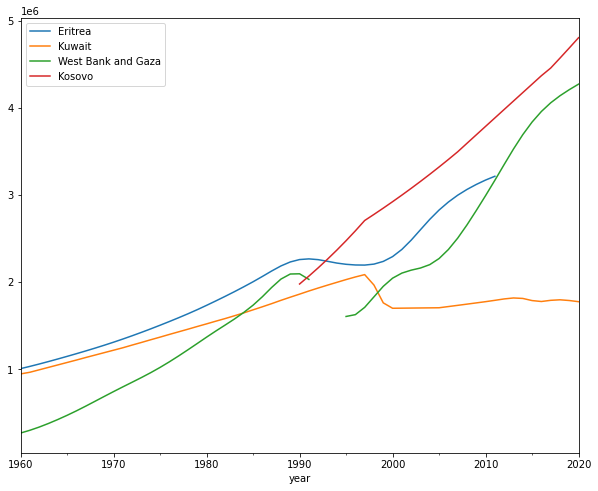

In [87]:
# convert year to a date time
df_melt_p['year'] = pd.to_datetime(df_melt_p['year'])

def plot_results(column_name):
    # plot the results for Eritrea, Kuwait, West Bank and Gaza and Kosovo
    fig, ax = plt.subplots(figsize=(10,8))

    df_melt_p[(df_melt_p['Country Name'] == 'Eritrea') | 
            (df_melt_p['Country Name'] == 'Kuwait') | 
            (df_melt_p['Country Name'] == 'West Bank and Gaza') |
            (df_melt_p['Country Name'] == 'Kosovo')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Eritrea', 'Kuwait', 'West Bank and Gaza','Kosovo'])
    
plot_results('population')

In [88]:
df_melt_p['population_filled']

0            54208.0
1        130836765.0
2          8996967.0
3         96396419.0
4          5454938.0
            ...     
16221      1775378.0
16222     29825968.0
16223     59308690.0
16224     18383956.0
16225     14862927.0
Name: population_filled, Length: 16226, dtype: float64

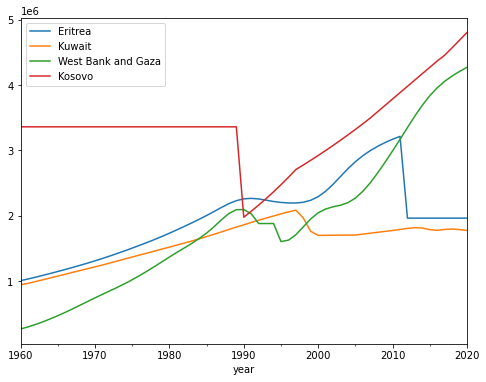

In [27]:
#Filling the null values of each country by the mean of population of each country
df_melt_p['population_filled'] = df_melt_p.groupby('Country Name')['population'].transform(lambda x: x.fillna(x.mean()))
plot_results('population_filled')

Using the mean values to fill the missing values is not a good idea as the population usually increases over time.
(case Kosovo)

Using forward fill and backward fill instead

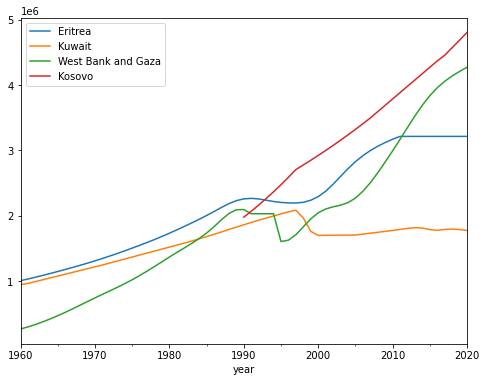

In [73]:
df_melt_p['population_ffill'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill')
plot_results('population_ffill')

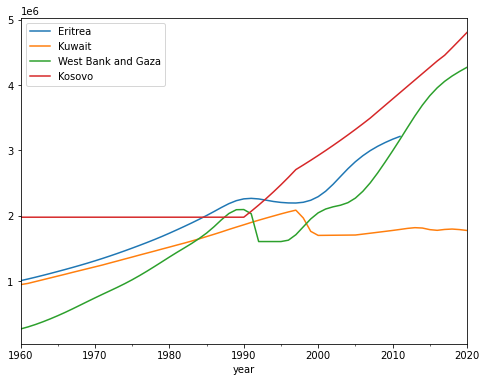

In [74]:
df_melt_p['population_bfill'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='bfill')
plot_results('population_bfill')

In [94]:
# Running forward fill and backward fill on the population data
df_melt_p['population_ff_bf'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# Check if any GDP values are null
df_melt_p['population_ff_bf'].isnull().sum()

0

In [93]:
# Running forward fill and backward fill on the population data
df_melt_p['population_ff_bf'] = df_melt_p.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

Imputing the missing values for GDP as well

In [95]:
# put the GDP data set into long form instead of wide
df_melt_g = pd.melt(df_gdp, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='gdp')

df_melt_g.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,year,gdp
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,147.612227
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,59.773234


In [91]:
df_melt_g['year'] = pd.to_datetime(df_melt_g['year'])

In [92]:
df_melt_g['year']

0       1960-01-01
1       1960-01-01
2       1960-01-01
3       1960-01-01
4       1960-01-01
           ...    
16221   2020-01-01
16222   2020-01-01
16223   2020-01-01
16224   2020-01-01
16225   2020-01-01
Name: year, Length: 16226, dtype: datetime64[ns]

0

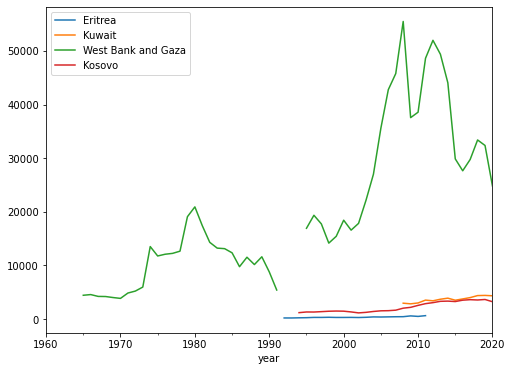

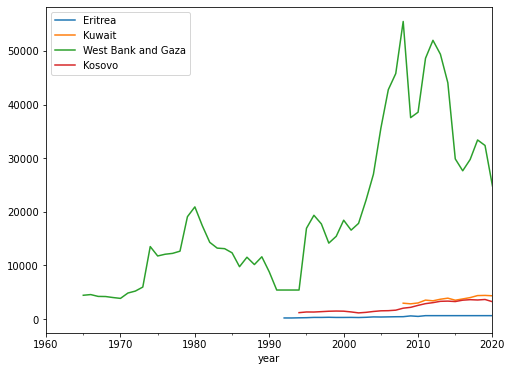

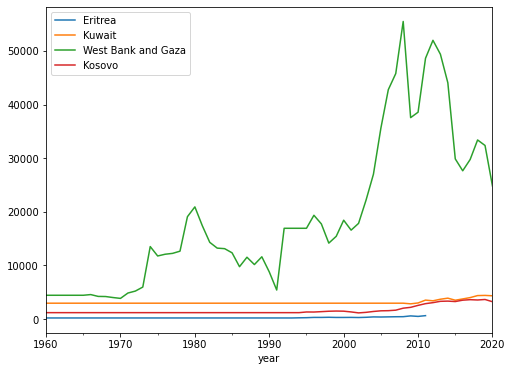

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

# put the data set into long form instead of wide
df_melt_g = pd.melt(df_gdp, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='gdp')

df_melt_g.head(3)

df_melt_g['year'] = pd.to_datetime(df_melt_g['year'])

def plot_results(column_name):
    # plot the results for Eritrea, Kuwait, West Bank and Gazavand Kosovo
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt_g[(df_melt_g['Country Name'] == 'Eritrea') | 
            (df_melt_g['Country Name'] == 'Kuwait') | 
            (df_melt_g['Country Name'] == 'West Bank and Gaza') |
            (df_melt_g['Country Name'] == 'Kosovo')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Eritrea', 'Kuwait', 'West Bank and Gaza','Kosovo'])

plot_results('gdp')
df_melt_g['gdp_ffill'] = df_melt_g.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill')
plot_results('gdp_ffill')

df_melt_g['gdp_bfill'] = df_melt_g.sort_values('year').groupby('Country Name')['gdp'].fillna(method='bfill')
plot_results('gdp_bfill')

# Run forward fill and backward fill on the gdp data
df_melt_g['gdp_ff_bf'] = df_melt_g.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')


# Check if any GDP values are null
df_melt_g['gdp_ff_bf'].isnull().sum()


##### Creating Dummy Variables

In [77]:
df_projects.columns

Index(['id', 'regionname', 'countryname', 'projectstatusdisplay',
       'project_name', 'pdo', 'impagency', 'cons_serv_reqd_ind', 'url',
       'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2', 'Official Country Name', 'Country Code',
       'approvalyear', 'approvalday', 'approvalweekday', 'closingyear',
       'closingday', 'closingweekday'],
      dtype='object')

In [103]:
# keep the project name, lending, sector and theme data
sector = df_projects.copy()
sector = sector[['regionname', 'countryname', 'projectstatusdisplay',
       'project_name', 'pdo', 'impagency', 'cons_serv_reqd_ind', 'url',
       'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2', 'Country Code', 'Official Country Name',
       'approvalyear', 'approvalday', 'approvalweekday', 'closingyear',
       'closingday', 'closingweekday']]

In [104]:
sector.isnull().sum()

regionname                      2
countryname                     2
projectstatusdisplay            2
project_name                    0
pdo                          9966
impagency                   14939
cons_serv_reqd_ind          20038
url                             0
boardapprovaldate            2874
closingdate                  5022
projectfinancialtype         8613
curr_project_cost             147
curr_ibrd_commitment            0
curr_ida_commitment             0
curr_total_commitment           0
grantamt                        0
borrower                    15171
lendinginstr                  248
envassesmentcategorycode     8391
esrc_ovrl_risk_rate         20277
sector1                      2002
sector2                     10432
sector3                     13987
theme1                       9219
theme2                      11579
Country Code                    0
Official Country Name           2
approvalyear                 2874
approvalday                  2874
approvalweekda

In [105]:
sector.shape[0]

21474

In [79]:
# output percentage of values that are missing
100*sector.isnull().sum() / sector.shape[0]

regionname                   0.009314
countryname                  0.009314
projectstatusdisplay         0.009314
project_name                 0.000000
pdo                         46.409612
impagency                   69.567849
cons_serv_reqd_ind          93.312843
url                          0.000000
boardapprovaldate           13.383627
closingdate                 23.386421
projectfinancialtype        40.108969
curr_project_cost            0.684549
curr_ibrd_commitment         0.000000
curr_ida_commitment          0.000000
curr_total_commitment        0.000000
grantamt                     0.000000
borrower                    70.648226
lendinginstr                 1.154885
envassesmentcategorycode    39.075161
esrc_ovrl_risk_rate         94.425817
sector1                      9.322902
sector2                     48.579678
sector3                     65.134581
theme1                      42.930986
theme2                      53.921021
Country Code                 0.000000
Official Cou

In [107]:
uniquesectors1 = sector['sector1'].sort_values().unique()
uniquesectors1

array(['(Historic)Agency reform', '(Historic)Agricultural credit',
       '(Historic)Agricultural extension',
       '(Historic)Agriculture adjustment', '(Historic)Agro-industry',
       '(Historic)Agro-industry and marketing', '(Historic)Annual crops',
       '(Historic)Basic health', '(Historic)Business environment',
       '(Historic)Civil service reform', '(Historic)Decentralization',
       '(Historic)Distribution and transmission',
       '(Historic)Economic management', '(Historic)Education adjustment',
       '(Historic)Electric power and other energy adjustment',
       '(Historic)Environment adjustment',
       '(Historic)Environmental institutions',
       '(Historic)Fertilizer and other chemicals',
       '(Historic)Financial adjustment',
       '(Historic)Financial sector development', '(Historic)HIV/AIDS',
       '(Historic)Highways', '(Historic)Hydro',
       '(Historic)Industrial adjustment',
       '(Historic)Industrial restructuring',
       '(Historic)Institutional D

In [108]:
print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 160


In [111]:
sector['sector1'] = sector['sector1'].replace('^(\(Historic\))', '', regex=True)

In [112]:
uniquesectors1

array(['(Historic)Agency reform', '(Historic)Agricultural credit',
       '(Historic)Agricultural extension',
       '(Historic)Agriculture adjustment', '(Historic)Agro-industry',
       '(Historic)Agro-industry and marketing', '(Historic)Annual crops',
       '(Historic)Basic health', '(Historic)Business environment',
       '(Historic)Civil service reform', '(Historic)Decentralization',
       '(Historic)Distribution and transmission',
       '(Historic)Economic management', '(Historic)Education adjustment',
       '(Historic)Electric power and other energy adjustment',
       '(Historic)Environment adjustment',
       '(Historic)Environmental institutions',
       '(Historic)Fertilizer and other chemicals',
       '(Historic)Financial adjustment',
       '(Historic)Financial sector development', '(Historic)HIV/AIDS',
       '(Historic)Highways', '(Historic)Hydro',
       '(Historic)Industrial adjustment',
       '(Historic)Industrial restructuring',
       '(Historic)Institutional D

In [113]:
print('Number of unique sectors after cleaning:', len(list(sector['sector1'].unique())))
print('Percentage of null values after cleaning:', 100 * sector['sector1'].isnull().sum() / sector['sector1'].shape[0])

Number of unique sectors after cleaning: 157
Percentage of null values after cleaning: 9.322902114184595


In [115]:
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']))

#  Filter the projects data for the totalamt, the year from boardapprovaldate, and the dummy variables
df_projects['year'] = df_projects['boardapprovaldate'].dt.year
df = df_projects[['curr_project_cost','year']]
df_final = pd.concat([df, dummies], axis=1)

df_final.head()

,curr_project_cost,year,"Adult, Basic and Continuing Education",Agency reform,"Agricultural Extension, Research, and Other Support Activities",Agricultural credit,Agricultural extension,"Agricultural markets, commercialization and agri-business",Agriculture adjustment,Agro-industry,...,Urban environment,Urban housing,Urban management,Urban transport,Urban water supply,Vocational training,Waste Management,Water Supply,Water supply and sanitation adjustment,Workforce Development and Vocational Education
0,23500000.0,2022.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130000.0,2022.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,500000000.0,2022.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56400000.0,2022.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90000000.0,2022.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df_final.columns

Index(['curr_project_cost', 'year', 'Adult, Basic and Continuing Education',
       'Agency reform',
       'Agricultural Extension, Research, and Other Support Activities',
       'Agricultural credit', 'Agricultural extension',
       'Agricultural markets, commercialization and agri-business',
       'Agriculture adjustment', 'Agro-industry',
       ...
       'Urban environment', 'Urban housing', 'Urban management',
       'Urban transport', 'Urban water supply', 'Vocational training',
       'Waste Management', 'Water Supply',
       'Water supply and sanitation adjustment',
       'Workforce Development and Vocational Education'],
      dtype='object', length=158)

##### Finding Outliers

In [116]:
# read in the projects data set and do basic wrangling 
gdp = df_gdp.copy()
gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)

# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = df_population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))
df_country['gdp'] = pd.to_numeric(df_country['gdp'])
#df_country['year'] = pd.to_numeric(df_country['year'])
df_country['population'] = pd.to_numeric(df_country['population'])
# filter data for the year 2020
df_2020 = df_country[df_country['year'] == '2020']

# see what the data looks like
df_2020

,Country Name,year,gdp,population
15960,Aruba,2020,30253.279358,106766.0
15961,Africa Eastern and Southern,2020,1359.618224,677243299.0
15962,Afghanistan,2020,516.747871,38928341.0
15963,Africa Western and Central,2020,1710.073363,458803476.0
15964,Angola,2020,1776.166868,32866268.0
...,...,...,...,...
16221,Kosovo,2020,4346.637931,1775378.0
16222,"Yemen, Rep.",2020,758.145242,29825968.0
16223,South Africa,2020,5655.867654,59308690.0
16224,Zambia,2020,985.132436,18383956.0


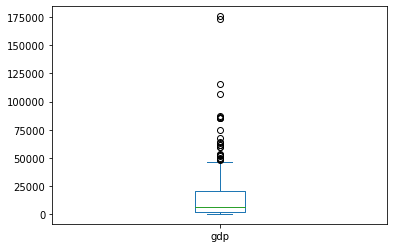

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Make a boxplot of the population data for the year 2020
df_2020.plot('population',kind='box');


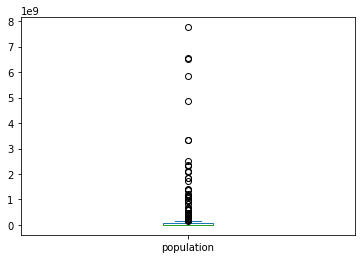

In [118]:
# Make a boxplot of the gdp data for the year 2020
df_2020.plot('gdp',kind='box');

2-D perspective of the outliers

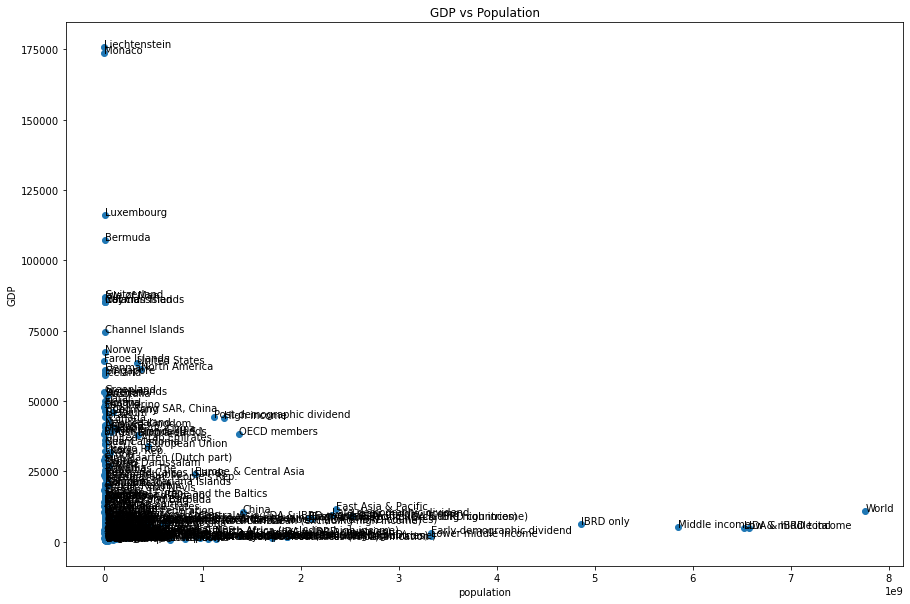

In [119]:
x = list(df_2020['population'])
y = list(df_2020['gdp'])
text = df_2020['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

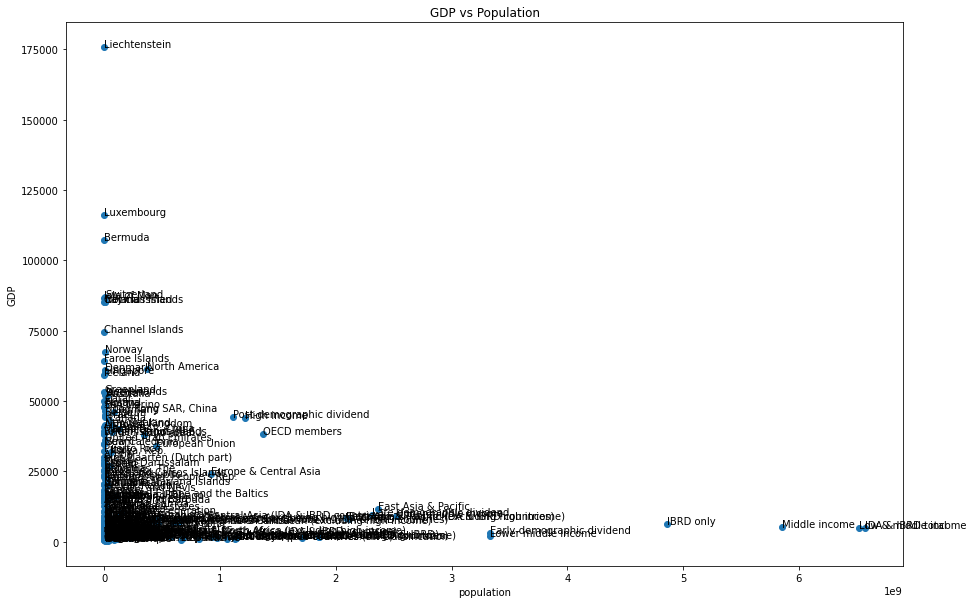

In [90]:
df_no_large = (df_2020['Country Name'] != 'United States') & (df_2020['Country Name'] != 'World')  & (df_2020['Country Name'] != 'India') & (df_2020['Country Name'] != 'Monaco') & (df_2020['Country Name'] != 'China')
x = list(df_2020[df_no_large]['population'])
y = list(df_2020[df_no_large]['gdp'])
text = df_2020[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

Use the Tukey rule to determine what values of the population data are outliers for the year 2020. The Tukey rule finds outliers in one-dimension. The steps are:

Find the first quartile (ie .25 quantile)
Find the third quartile (ie .75 quantile)
Calculate the inter-quartile range (Q3 - Q1)
Any value that is greater than Q3 + 1.5 * IQR is an outlier
Any value that is less than Qe - 1.5 * IQR is an outlier

In [120]:
population_2020 = df_2020[['Country Name','population']]

# Calculate the first quartile of the population values for 2020
Q1 = population_2020['population'].quantile(0.25)

# Calculate the third quartile of the population values for 2020
Q3 = population_2020['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2020 data for population values that are greater than max_value or less than min_value
population_outliers = population_2020[(population_2020['population'] > max_value) | (population_2020['population'] < min_value)]
population_outliers

,Country Name,population
15961,Africa Eastern and Southern,6.772433e+08
15963,Africa Western and Central,4.588035e+08
15967,Arab World,4.360807e+08
15980,Bangladesh,1.646894e+08
15989,Brazil,2.125594e+08
16000,China,1.410929e+09
16021,East Asia & Pacific (excluding high income),2.113821e+09
16022,Early-demographic dividend,3.332105e+09
16023,East Asia & Pacific,2.360855e+09
16024,Europe & Central Asia (excluding high income),4.202117e+08


Most of the countries listed here are regions rather than countries

In [122]:
# remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2020 variable

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']



In [123]:
# remove non countries from the data
df_2020 = df_2020[~df_2020['Country Name'].isin(non_countries)]

Re-reruning the Tukey code with this filtered data to find population outliers

In [124]:
# Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
population_2020 = df_2020[['Country Name','population']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method 
Q1 = population_2020['population'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = population_2020['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2020[(population_2020['population'] > max_value) | (population_2020['population'] < min_value)]
population_outliers

,Country Name,population
15961,Africa Eastern and Southern,6.772433e+08
15963,Africa Western and Central,4.588035e+08
15980,Bangladesh,1.646894e+08
15989,Brazil,2.125594e+08
16000,China,1.410929e+09
16003,"Congo, Dem. Rep.",8.956140e+07
16015,Germany,8.324052e+07
16027,"Egypt, Arab Rep.",1.023344e+08
16032,Ethiopia,1.149636e+08
16037,France,6.739158e+07


Running the Tukey code with this filtered data to find gdp outliers

In [95]:

# to keep the Country Name and population columns
gdp_2020 = df_2020[['Country Name','gdp']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method 
Q1 = gdp_2020['gdp'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = gdp_2020['gdp'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2020[(gdp_2020['gdp'] > max_value) | (gdp_2020['gdp'] < min_value)]
gdp_outliers

,Country Name,gdp
15987,Bermuda,107079.479837
15997,Switzerland,87097.036450
15998,Channel Islands,74458.794666
16012,Cayman Islands,85082.526856
16018,Denmark,61063.316430
16038,Faroe Islands,64225.264905
16051,Greenland,53041.303310
16068,Isle of Man,86481.552591
16071,Ireland,85267.764744
16074,Iceland,59270.180051


In [96]:
# Finding country names that are in both the population_outliers and the gdp_outliers 
list(set(population_outliers['Country Name']).intersection(gdp_outliers['Country Name']))

['United States']

In [97]:
# Finding country names that are in the population outliers list but not the gdp outliers list
list(set(population_outliers['Country Name']) - set(gdp_outliers['Country Name']))

['Pakistan',
 'Africa Western and Central',
 'Philippines',
 'Turkey',
 'Egypt, Arab Rep.',
 'Mexico',
 'Germany',
 'United Kingdom',
 'Bangladesh',
 'Russian Federation',
 'Congo, Dem. Rep.',
 'Nigeria',
 'China',
 'Brazil',
 'Iran, Islamic Rep.',
 'France',
 'Vietnam',
 'India',
 'Indonesia',
 'Africa Eastern and Southern',
 'Japan',
 'Ethiopia',
 'Thailand']

In [98]:
# Finding country names that are in the gdp outliers list but not the population outliers list
list(set(gdp_outliers['Country Name']) - set(population_outliers['Country Name']))

['Monaco',
 'Channel Islands',
 'Luxembourg',
 'Iceland',
 'Ireland',
 'Greenland',
 'Liechtenstein',
 'Singapore',
 'Denmark',
 'Switzerland',
 'Netherlands',
 'Norway',
 'Isle of Man',
 'Sweden',
 'Cayman Islands',
 'Bermuda',
 'Faroe Islands']

##### Linear regression Model 

In [99]:
df_2020

,Country Name,year,gdp,population
15960,Aruba,2020,30253.279358,106766.0
15961,Africa Eastern and Southern,2020,1359.618224,677243299.0
15962,Afghanistan,2020,516.747871,38928341.0
15963,Africa Western and Central,2020,1710.073363,458803476.0
15964,Angola,2020,1776.166868,32866268.0
...,...,...,...,...
16221,Kosovo,2020,4346.637931,1775378.0
16222,"Yemen, Rep.",2020,758.145242,29825968.0
16223,South Africa,2020,5655.867654,59308690.0
16224,Zambia,2020,985.132436,18383956.0


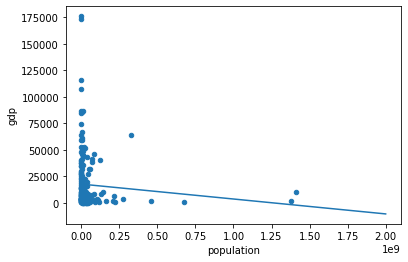

In [100]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression()
#model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))
model.fit(df_2020['population'].values.reshape(-1, 1), df_2020['gdp'].values.reshape(-1, 1))
# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2020.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions)


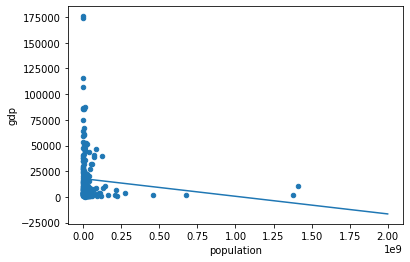

In [101]:
# Remove the United States to see what happens with the linear regression model
df_2020[df_2020['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2020[df_2020['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2020[df_2020['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)

Function to Remove Outliers

In [102]:
# Write a function that uses the Tukey rule to detect outliers in a dataframe column 
# and then removes that entire row from the data frame. For example, if the United States 
# is detected to be a GDP outlier, then remove the entire row of United States data.
# The function inputs should be a data frame and a column name.
# The output is a data_frame with the outliers eliminated

def tukey_rule(data_frame, column_name):
    data = data_frame[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR
    
    return data_frame[(data_frame[column_name] < max_value) & (data_frame[column_name] > min_value)]

In [103]:
# Use the tukey_rule() function to make a new data frame with gdp and population outliers removed
# Put the results in the df_outlier_removed variable

df_outlier_removed = df_2020.copy()

for column in ['population','gdp']:
    df_outlier_removed = tukey_rule(df_outlier_removed, column)

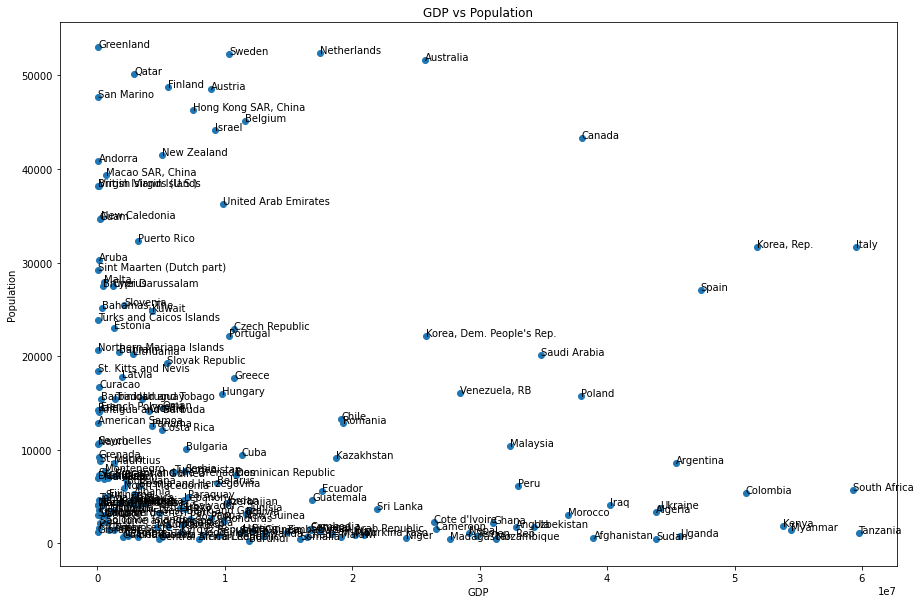

In [104]:
# plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

##### Scaling Data

Standardization refers to scaling a set of values so that they have a mean of zero and a standard deviation of one.

Normalization refers to scaling a set of values so that the range if between zero and one.

To normalize data, you take a feature, like gdp, and use the following formula

$x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$

where 
* x is a value of gdp
* x_max is the maximum gdp in the data
* x_min is the minimum GDP in the data

First, write a function that outputs the x_min and x_max values of an array. The inputs are an array of data (like the GDP data). The outputs are the x_min and x_max values

In [107]:
def x_min_max(data):
    minimum = min(data)
    maximum = max(data)
    return minimum, maximum

x_min_max(df_2020['gdp'])

(238.99072585649617, 175813.87559205844)

In [108]:
def normalize(x, x_min, x_max):
    # Complete this function
    # The input is a single value 
    # The output is the normalized value
    return (x - x_min) / (x_max - x_min)

In [109]:
class Normalizer():
    # Complete the normalizer class
    # The normalizer class receives a dataframe as its only input for initialization
    # For example, the data frame might contain gdp and population data in two separate columns
    
    def __init__(self, dataframe):
        
        # complete the init function. 
        # Assume the dataframe has an unknown number of columns like [['gdp', 'population']] 
        # iterate through each column calculating the min and max for each column
        # append the results to the params attribute list
        
        # For example, take the gdp column and calculate the minimum and maximum
        # Put these results in a list [minimum, maximum]
        # Append the list to the params variable
        # Then take the population column and do the same
        
        self.params = []

        for column in dataframe.columns:
            self.params.append(x_min_max(dataframe[column]))
            
    def x_min_max(data):
        # complete the x_min_max method
        minimum = min(data)
        maximum = max(data)
        return minimum, maximum

    def normalize_data(self, x):
        # complete the normalize_data method
        # The function receives a data point as an input and then outputs the normalized version
        # For example, if an input data point of [gdp, population] were used. Then the output would
        # be the normalized version of the [gdp, population] data point
        # Put the results in the normalized variable defined below
        
        # Assume that the columns in the dataframe used to initialize an object are in the same
        # order as this data point x
        # You'll need to iterate through the individual values in the x variable        
        # Use the params attribute where the min and max values are stored 
        normalized = []
        for i, value in enumerate(x):
            x_max = self.params[i][1]
            x_min = self.params[i][0]
            normalized.append((x[i] - x_min) / (x_max - x_min))
        return normalized

In [111]:
gdp_normalizer = Normalizer(df_2020[['gdp', 'population']])

In [112]:
gdp_normalizer.params

[(238.99072585649617, 175813.87559205844), (10834.0, 1410929362.0)]

In [113]:
gdp_normalizer.normalize_data([13424475000000.0, 1300000000])

[76460109.94107287, 0.9213779110568175]

When normalizing or standardizing features for machine learning, you'll need to store the parameters you used to do the scaling. That way you can scale new data points when making predictions. In this exercise, you stored the minimum and maximum values of a feature. When standardizing data, you would need to store the mean and standard deviation. The standardization formula is:

$x_{standardized} = \frac{x - \overline{x}}{S}$

##### Feature Engineering

In [114]:
# create a new feature called gdppercapita, 
#      which is the gdp value divided by the population value for each country
df_2020.reset_index(inplace=True, drop=True)
df_2020['gdppercapita'] = df_2020['gdp'] / df_2020['population']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [115]:
df_2020['gdppercapita']

0      0.283361
1      0.000002
2      0.000013
3      0.000004
4      0.000054
         ...   
214    0.002448
215    0.000025
216    0.000095
217    0.000054
218    0.000082
Name: gdppercapita, Length: 219, dtype: float64

## LOAD

In [116]:
df_melt_g

,Country Name,Country Code,Indicator Name,Indicator Code,year,gdp,gdp_ffill,gdp_bfill,gdp_ff_bf
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,1960-01-01,NaN,NaN,6472.398709,234.938897
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,1960-01-01,147.612227,147.612227,147.612227,147.612227
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,1960-01-01,59.773234,59.773234,59.773234,59.773234
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,1960-01-01,107.932233,107.932233,107.932233,107.932233
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,1960-01-01,NaN,NaN,711.409579,1810.619230
...,...,...,...,...,...,...,...,...,...
16221,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,2020-01-01,4346.637931,4346.637931,4346.637931,4346.637931
16222,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,2020-01-01,NaN,758.145242,NaN,758.145242
16223,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,2020-01-01,5655.867654,5655.867654,5655.867654,5655.867654
16224,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2020-01-01,985.132436,985.132436,985.132436,985.132436


In [117]:
df_melt_p['Year'] = df_melt_p['year'].dt.year
df_melt_p.rename(columns={"year": "datetime"},inplace=True)
df_melt_g['Year'] = df_melt_g['year'].dt.year
df_melt_g.rename(columns={"year": "datetime"},inplace=True)

In [118]:
df_projects['Year'] = df_projects['year'].values.astype(np.int64)
df_projects.drop('year',axis=1)

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,theme2,Official Country Name,Country Code,approvalyear,approvalday,approvalweekday,closingyear,closingday,closingweekday,Year
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,NaN,http://projects.worldbank.org/P174708/null?lan...,2022-03-21 00:00:00+00:00,...,NaN,West Bank and Gaza,,2022.0,21.0,0.0,NaN,NaN,NaN,2022
1,P176877,Latin America and Caribbean,Federative Republic of Brazil,Active,Governance Risk Assessment System Brazil Scale-Up,Improve the process of detecting fraud in publ...,National Council for Internal Control - CONACI,NaN,http://projects.worldbank.org/P176877/null?lan...,2022-03-21 00:00:00+00:00,...,NaN,Federative Republic of Brazil,BRA,2022.0,21.0,0.0,NaN,NaN,NaN,2022
2,P160865,Africa West,Federal Republic of Nigeria,Active,Livestock Productivity and Resilience Support ...,"To improve productivity, commercialization, an...",Federal Ministry of Agriculture and Rural Deve...,Y,http://projects.worldbank.org/P160865/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,Federal Republic of Nigeria,NGA,2022.0,18.0,4.0,NaN,NaN,NaN,2022
3,P170113,Europe and Central Asia,Republic of Kosovo,Active,Kosovo Public Finances and Sustainable Growth ...,The objective of the proposed Public Finances ...,"Ministry of Finance, Labor and Transfers",NaN,http://projects.worldbank.org/P170113/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,Republic of Kosovo,,2022.0,18.0,4.0,2023.0,30.0,5.0,2022
4,P172922,Africa East,United Republic of Tanzania,Active,Additional Financing to the Citizen-Centric Ju...,The project development objective is to improv...,Judiciary of Tanzania,NaN,http://projects.worldbank.org/P172922/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,United Republic of Tanzania,TZA,2022.0,18.0,4.0,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21469,P006578,Latin America and Caribbean,Republic of Chile,Closed,Power and Irrigation Project,NaN,NaN,NaN,http://projects.worldbank.org/P006578/null?lan...,1948-03-25 00:00:00+00:00,...,NaN,Republic of Chile,CHL,1948.0,25.0,3.0,1954.0,31.0,4.0,1948
21470,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Closed,Steel Mill and Railway Project,NaN,NaN,NaN,http://projects.worldbank.org/P037451/null?lan...,1947-08-28 00:00:00+00:00,...,NaN,Grand Duchy of Luxembourg,LUX,1947.0,28.0,3.0,1949.0,31.0,3.0,1947
21471,P037362,Europe and Central Asia,Kingdom of Denmark,Closed,Post War Reconstruction Project,NaN,NaN,NaN,http://projects.worldbank.org/P037362/null?lan...,1947-08-22 00:00:00+00:00,...,NaN,Kingdom of Denmark,DNK,1947.0,22.0,4.0,1949.0,31.0,3.0,1947
21472,P037452,Europe and Central Asia,Kingdom of the Netherlands,Closed,Post-war Reconstruction Project,NaN,NaN,NaN,http://projects.worldbank.org/P037452/null?lan...,1947-08-07 00:00:00+00:00,...,NaN,Kingdom of the Netherlands,NLD,1947.0,7.0,3.0,1948.0,30.0,2.0,1947


In [119]:
df_melt_p.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,datetime,population,population_filled,population_ffill,population_bfill,population_ff_bf,Year
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960-01-01,54208.0,54208.0,54208.0,54208.0,54208.0,1960
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960-01-01,130836765.0,130836765.0,130836765.0,130836765.0,130836765.0,1960
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960-01-01,8996967.0,8996967.0,8996967.0,8996967.0,8996967.0,1960


In [120]:
df_projects.head(3)

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,Official Country Name,Country Code,approvalyear,approvalday,approvalweekday,closingyear,closingday,closingweekday,year,Year
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,NaN,http://projects.worldbank.org/P174708/null?lan...,2022-03-21 00:00:00+00:00,...,West Bank and Gaza,,2022.0,21.0,0.0,NaN,NaN,NaN,2022.0,2022
1,P176877,Latin America and Caribbean,Federative Republic of Brazil,Active,Governance Risk Assessment System Brazil Scale-Up,Improve the process of detecting fraud in publ...,National Council for Internal Control - CONACI,NaN,http://projects.worldbank.org/P176877/null?lan...,2022-03-21 00:00:00+00:00,...,Federative Republic of Brazil,BRA,2022.0,21.0,0.0,NaN,NaN,NaN,2022.0,2022
2,P160865,Africa West,Federal Republic of Nigeria,Active,Livestock Productivity and Resilience Support ...,"To improve productivity, commercialization, an...",Federal Ministry of Agriculture and Rural Deve...,Y,http://projects.worldbank.org/P160865/null?lan...,2022-03-18 00:00:00+00:00,...,Federal Republic of Nigeria,NGA,2022.0,18.0,4.0,NaN,NaN,NaN,2022.0,2022


In [121]:
df_merged = df_melt_g.merge(df_melt_p, on=['Country Code','Year'])
df_merged_final = df_projects.merge(df_merged,how='left', on=['Country Code','Year'])
df_merged_final.head(3)
df_merged_final.columns

Index(['id', 'regionname', 'countryname', 'projectstatusdisplay',
       'project_name', 'pdo', 'impagency', 'cons_serv_reqd_ind', 'url',
       'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2', 'Official Country Name', 'Country Code',
       'approvalyear', 'approvalday', 'approvalweekday', 'closingyear',
       'closingday', 'closingweekday', 'year', 'Year', 'Country Name_x',
       'Indicator Name_x', 'Indicator Code_x', 'datetime_x', 'gdp',
       'gdp_ffill', 'gdp_bfill', 'gdp_ff_bf', 'Country Name_y',
       'Indicator Name_y', 'Indicator Code_y', 'datetime_y', 'population',
       'population_filled', 'population_ffill', 'population_bfill',
       'population_ff_bf'],
      dtype='object')

In [122]:
#df_merged_final.drop('year')

Checking Data for Year 2020

In [123]:
df_merged_final[(df_merged_final['Year'] == 2020)]

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,gdp_ff_bf,Country Name_y,Indicator Name_y,Indicator Code_y,datetime_y,population,population_filled,population_ffill,population_bfill,population_ff_bf
607,P174761,Europe and Central Asia,Republic of Moldova,Active,Moldova Pandemic Emergency Financing for COVID-19,"The objectives of the Project are to prevent, ...","Ministry of Health, Labor and Social Protection.",NaN,http://projects.worldbank.org/P174761/null?lan...,2020-12-23 00:00:00+00:00,...,4547.059721,Moldova,"Population, total",SP.POP.TOTL,2020-01-01,2620495.0,2620495.0,2620495.0,2620495.0,2620495.0
608,P174144,Europe and Central Asia,Republic of Turkey,Active,Turkey Rapid Support for Micro and Small Enter...,The Project Development Objective (PDO) is to ...,Small and Medium Enterprises Development Organ...,NaN,http://projects.worldbank.org/P174144/null?lan...,2020-12-18 00:00:00+00:00,...,8536.433320,Turkey,"Population, total",SP.POP.TOTL,2020-01-01,84339067.0,84339067.0,84339067.0,84339067.0,84339067.0
609,P175740,Africa West,Republic of The Gambia,Active,AF to The Gambia COVID-19 Preparedness and Res...,"To prevent, detect and respond to the threat p...",Ministry of Health,NaN,http://projects.worldbank.org/P175740/null?lan...,2020-12-18 00:00:00+00:00,...,773.002070,"Gambia, The","Population, total",SP.POP.TOTL,2020-01-01,2416664.0,2416664.0,2416664.0,2416664.0,2416664.0
610,P175977,Latin America and Caribbean,Republic of Honduras,Active,Honduras Tropical Cyclones Eta and Iota Emerge...,The Project Development Objective is to suppor...,SEDECOAS (Secretaría de Desarrollo Comunitario...,NaN,http://projects.worldbank.org/P175977/null?lan...,2020-12-18 00:00:00+00:00,...,2389.012431,Honduras,"Population, total",SP.POP.TOTL,2020-01-01,9904608.0,9904608.0,9904608.0,9904608.0,9904608.0
611,P172979,Middle East and North Africa,Republic of Djibouti,Active,Djibouti Integrated Slum Upgrading Project - A...,The proposed revised development objective is ...,ARULOS,NaN,http://projects.worldbank.org/P172979/null?lan...,2020-12-18 00:00:00+00:00,...,3425.484176,Djibouti,"Population, total",SP.POP.TOTL,2020-01-01,988002.0,988002.0,988002.0,988002.0,988002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,P171037,Other,World,Active,Quality Assurance Capacity Building for the Of...,The objective of the small grant is to provide...,CLASP,NaN,http://projects.worldbank.org/P171037/null?lan...,2020-01-14 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1220,P172731,East Asia and Pacific,Socialist Republic of Vietnam,Active,Ho Chi Minh Green Transport Development Project,The project development objective is to improv...,Transport Works Construction Investment Projec...,NaN,http://projects.worldbank.org/P172731/null?lan...,2020-01-14 00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1221,P162278,Latin America and Caribbean,Republic of Peru,Active,National Urban Cadaster and Municipal Support ...,The project development objective is to improv...,NaN,Y,http://projects.worldbank.org/P162278/null?lan...,2020-01-10 00:00:00+00:00,...,6126.874540,Peru,"Population, total",SP.POP.TOTL,2020-01-01,32971846.0,32971846.0,32971846.0,32971846.0,32971846.0
1222,P165235,East Asia and Pacific,Kingdom of Thailand,Active,Thailand HCFC Phase-Out Stage II,The project development objective is to contri...,Department of Industrial Works,NaN,http://projects.worldbank.org/P165235/null?lan...,2020-01-10 00:00:00+00:00,...,7186.874092,Thailand,"Population, total",SP.POP.TOTL,2020-01-01,69799978.0,69799978.0,69799978.0,69799978.0,69799978.0


In [124]:
df_merged_final.to_json('countrydata.json', orient='records')

In [125]:
df_merged_final.to_csv('countrydata.csv', index=False)

In [126]:
df_merged_final.drop(['year'], inplace=True, axis=1)

In [127]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

df_merged_final.to_sql('merged_final', con = conn, if_exists='replace', index=False)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [128]:
#pd.read_sql('SELECT * FROM merged_final WHERE Year = 2017 AND Country Code = "BRA"', con = conn).head()
pd.read_sql('SELECT * FROM merged_final', con = conn).head()

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,gdp_ff_bf,Country Name_y,Indicator Name_y,Indicator Code_y,datetime_y,population,population_filled,population_ffill,population_bfill,population_ff_bf
0,P174708,Middle East and North Africa,West Bank and Gaza,Active,Phase 2 Advancing Sustainability in Performanc...,To improve operational and financial performan...,Palestinian Energy and Natural Resources Autho...,None,http://projects.worldbank.org/P174708/null?lan...,2022-03-21 00:00:00+00:00,...,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN
1,P176877,Latin America and Caribbean,Federative Republic of Brazil,Active,Governance Risk Assessment System Brazil Scale-Up,Improve the process of detecting fraud in publ...,National Council for Internal Control - CONACI,None,http://projects.worldbank.org/P176877/null?lan...,2022-03-21 00:00:00+00:00,...,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN
2,P160865,Africa West,Federal Republic of Nigeria,Active,Livestock Productivity and Resilience Support ...,"To improve productivity, commercialization, an...",Federal Ministry of Agriculture and Rural Deve...,Y,http://projects.worldbank.org/P160865/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN
3,P170113,Europe and Central Asia,Republic of Kosovo,Active,Kosovo Public Finances and Sustainable Growth ...,The objective of the proposed Public Finances ...,"Ministry of Finance, Labor and Transfers",None,http://projects.worldbank.org/P170113/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN
4,P172922,Africa East,United Republic of Tanzania,Active,Additional Financing to the Citizen-Centric Ju...,The project development objective is to improv...,Judiciary of Tanzania,None,http://projects.worldbank.org/P172922/null?lan...,2022-03-18 00:00:00+00:00,...,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [129]:
df_projects.drop(['year'], inplace=True, axis=1)

In [130]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

df_melt_g.to_sql('gdp', con = conn, if_exists='replace', index=False)
df_melt_p.to_sql('population', con = conn, if_exists='replace', index=False)
df_projects.to_sql('projects', con = conn, if_exists='replace', index=False)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [131]:
pd.read_sql('SELECT * FROM projects where year = 2020', con = conn).head()

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,theme2,Official Country Name,Country Code,approvalyear,approvalday,approvalweekday,closingyear,closingday,closingweekday,Year
0,P174761,Europe and Central Asia,Republic of Moldova,Active,Moldova Pandemic Emergency Financing for COVID-19,"The objectives of the Project are to prevent, ...","Ministry of Health, Labor and Social Protection.",None,http://projects.worldbank.org/P174761/null?lan...,2020-12-23 00:00:00+00:00,...,None,Republic of Moldova,MDA,2020.0,23.0,2.0,NaN,NaN,NaN,2020
1,P174144,Europe and Central Asia,Republic of Turkey,Active,Turkey Rapid Support for Micro and Small Enter...,The Project Development Objective (PDO) is to ...,Small and Medium Enterprises Development Organ...,None,http://projects.worldbank.org/P174144/null?lan...,2020-12-18 00:00:00+00:00,...,None,Republic of Turkey,TUR,2020.0,18.0,4.0,2023.0,30.0,4.0,2020
2,P175740,Africa West,Republic of The Gambia,Active,AF to The Gambia COVID-19 Preparedness and Res...,"To prevent, detect and respond to the threat p...",Ministry of Health,None,http://projects.worldbank.org/P175740/null?lan...,2020-12-18 00:00:00+00:00,...,None,Republic of The Gambia,GMB,2020.0,18.0,4.0,NaN,NaN,NaN,2020
3,P175977,Latin America and Caribbean,Republic of Honduras,Active,Honduras Tropical Cyclones Eta and Iota Emerge...,The Project Development Objective is to suppor...,SEDECOAS (Secretaría de Desarrollo Comunitario...,None,http://projects.worldbank.org/P175977/null?lan...,2020-12-18 00:00:00+00:00,...,None,Republic of Honduras,HND,2020.0,18.0,4.0,2026.0,31.0,3.0,2020
4,P172979,Middle East and North Africa,Republic of Djibouti,Active,Djibouti Integrated Slum Upgrading Project - A...,The proposed revised development objective is ...,ARULOS,None,http://projects.worldbank.org/P172979/null?lan...,2020-12-18 00:00:00+00:00,...,None,Republic of Djibouti,DJI,2020.0,18.0,4.0,NaN,NaN,NaN,2020


In [132]:
# commit any changes to the database and close the database
conn.commit()
conn.close()